<a href="https://colab.research.google.com/github/duocclases/SCA-202101-MineriaDatos-02-TEAM01/blob/main/lab2_grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PASO 1: Incluir librerías para el trabajo con el modelo

#Librerías Base
import pandas as pd #trabajo con datos
from pandas import set_option
import numpy as np #para trabajo con numeros y matrices
import matplotlib as mpl
from sklearn import linear_model


#Librerías para modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #separar automáticamente los datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression #regresión lineal

#Librerías para gráficos
import matplotlib.pyplot as plt #para graficar
from pandas.plotting import scatter_matrix #para gráficos de dispersión
import seaborn as sns
import scipy.stats as st


In [2]:
#PASO 2: Cargar los datos en un DataFrame

datos = pd.read_csv('https://raw.githubusercontent.com/duocclases/SCA-202101-MineriaDatos-02-TEAM01/main/lab2/20200821_EVALUACION_DOCENTE_2019_29072019_PUBL.csv', sep=';', decimal=',', header='infer')

In [16]:
#PASO 3.1: Ver los datos

datos.head()

,AGNO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,PF_ESC,PF_Cat_Carrera,INSTR_PJE,INSTR_ESC
0,2019,968,7,LICEO POLITECNICO PABLO RODRIGUEZ CAVIEDES,4,42,4201,ILLAPEL,43,CHOAPA,2,1,0,19803754,1,195209,7,2.55,C,B,2.73,C
1,2019,2716,2,ESCUELA MUNICIPAL SAN PEDRO DE ALCANTARA,6,62,6206,PAREDONES,63,CARDENAL CARO,2,1,1,14774056,1,193903,3,2.60,C,B,2.96,C
2,2019,2123,7,INSTITUTO TECNOLOGICO MINERO BERNARDO OHIGGINS,6,61,6101,RANCAGUA,61,CACHAPOAL,1,1,0,20162323,1,194103,7,1.70,I,E,2.32,B
3,2019,8548,0,ESCUELA BASICA DR LUIS CALVO MACKENNA,13,131,13101,SANTIAGO,131,SANTIAGO CENTRO,2,1,0,9861358,1,194301,3,1.65,I,E,1.89,I
5,2019,119,8,ESCUELA CENTENARIO,1,11,1101,IQUIQUE,11,IQUIQUE,1,1,0,7974384,2,195708,2,2.43,B,C,2.56,C


In [34]:
#PASO 3.2: Ver el tipo de datos

datos.dtypes

AGNO_EVAL           int64
RBD                 int64
DGV_RBD             int64
NOM_RBD            object
COD_REG_RBD         int64
COD_PRO_RBD         int64
COD_COM_RBD         int64
NOM_COM_RBD        object
COD_DEPROV_RBD      int64
NOM_DEPROV_RBD     object
COD_DEPE            int64
COD_DEPE2           int64
RURAL_RBD           int64
MRUN                int64
DOC_GENERO          int64
DOC_FEC_NAC         int64
NIVEL               int64
PF_PJE            float64
PF_ESC             object
PF_Cat_Carrera     object
INSTR_PJE         float64
INSTR_ESC          object
dtype: object

In [33]:
#PASO 3.3: Descripción de los datos

datos.describe()

,AGNO_EVAL,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,INSTR_PJE
count,17244.0,17244.00,17244.00,17244.00,17244.00,17244.00,17244.00,17244.00,17244.00,17244.00,1.72e+04,17244.00,17244.00,17244.00,17244.00,17244.00
mean,2019.0,7176.34,4.46,8.92,91.29,9135.11,88.16,1.89,1.17,0.23,1.25e+07,1.71,197892.20,3.46,2.27,2.65
std,0.0,6443.64,2.87,3.92,38.97,3898.79,36.90,0.96,0.80,0.42,7.26e+06,0.45,1080.63,1.37,0.30,0.27
min,2019.0,1.00,0.00,1.00,11.00,1101.00,11.00,1.00,1.00,0.00,2.01e+02,1.00,193903.00,1.00,1.00,1.00
25%,2019.0,2551.00,2.00,6.00,61.00,6106.00,61.00,1.00,1.00,0.00,6.34e+06,1.00,197107.00,3.00,2.10,2.49
50%,2019.0,5398.00,4.00,8.00,83.00,8309.00,83.00,2.00,1.00,0.00,1.25e+07,2.00,198204.00,3.00,2.28,2.65
75%,2019.0,9882.00,7.00,13.00,131.00,13114.00,132.00,2.00,1.00,0.00,1.89e+07,2.00,198801.00,4.00,2.45,2.82
max,2019.0,40429.00,9.00,16.00,163.00,16305.00,151.00,6.00,5.00,1.00,2.60e+07,2.00,199803.00,7.00,3.75,3.85


In [15]:
#PASO 4: Eliminar los valores que no aplican

#La variable que se va a estudiar es INSTR_PJE, que corresponde al Puntaje Final obtenido en la Evaluación Docente
#En este caso se deben eliminar las filas con el valor -1, que corresponden a los casos en que no hay un puntaje
#Corresponden a los casos en que el docente no realizó la Evaluación, por lo que no se deben considerar para este modelo

datos.drop(datos[datos['INSTR_PJE'] == -1].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


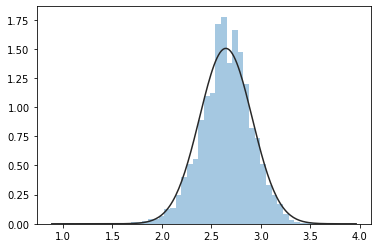

In [40]:
#PASO 5: Revisión de la distribución de la variable a predecir

#Grafico de distribución para la variable Y --> si la distribución se parece a normal, es viable construir un modelo con los datos
#La variable que se va a estudiar es INSTR_PJE, que corresponde al Puntaje Final en base a resultados en instrumentos
#En este caso, la distribución es normal, después de eliminar los valores que no aplican

#Opciones para el gráfico
set_option('display.width', 200)
set_option('precision', 2)

#Gráfico
y = datos.loc[:,'INSTR_PJE']
sns.distplot(tuple(y), kde=False, fit=st.norm)

In [41]:
#PASO 6.1: Análisis de Correlación entre Variables

#Se redondearon los resultados del coeficiente de correlación de Pearson entre las variables para compararlos más facilmente
#Según se observa, la variable que tiene mayor correlación con INSTR_PJE es PF_PJE con un nivel de 0.83
#Esto quiere decir que el puntaje del portafolio del docente sirve para predecir el puntaje final de la evaluación.

correlacion = datos.corr().round(decimals=2)
correlacion.head(22)

,AGNO_EVAL,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,INSTR_PJE
AGNO_EVAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RBD,NaN,1.00,0.01,0.41,0.41,0.41,0.46,-0.03,0.03,-0.15,-0.01,-0.02,-0.01,0.08,0.02,-0.02
DGV_RBD,NaN,0.01,1.00,0.01,0.01,0.01,0.00,-0.00,-0.01,0.01,0.01,0.01,0.00,-0.00,-0.00,-0.01
COD_REG_RBD,NaN,0.41,0.01,1.00,1.00,1.00,0.91,-0.07,-0.07,-0.02,-0.01,0.01,-0.02,0.00,0.04,0.05
COD_PRO_RBD,NaN,0.41,0.01,1.00,1.00,1.00,0.91,-0.07,-0.07,-0.01,-0.01,0.01,-0.02,0.00,0.04,0.05
COD_COM_RBD,NaN,0.41,0.01,1.00,1.00,1.00,0.91,-0.07,-0.07,-0.01,-0.01,0.01,-0.02,0.00,0.04,0.05
COD_DEPROV_RBD,NaN,0.46,0.00,0.91,0.91,0.91,1.00,-0.09,-0.05,-0.07,-0.00,0.01,-0.02,0.01,0.03,0.01
COD_DEPE,NaN,-0.03,-0.00,-0.07,-0.07,-0.07,-0.09,1.00,0.89,0.03,0.00,-0.00,0.01,-0.01,-0.01,-0.00
COD_DEPE2,NaN,0.03,-0.01,-0.07,-0.07,-0.07,-0.05,0.89,1.00,-0.05,0.00,0.00,0.00,0.01,-0.01,-0.02
RURAL_RBD,NaN,-0.15,0.01,-0.02,-0.01,-0.01,-0.07,0.03,-0.05,1.00,0.00,0.02,0.01,-0.16,-0.04,0.01


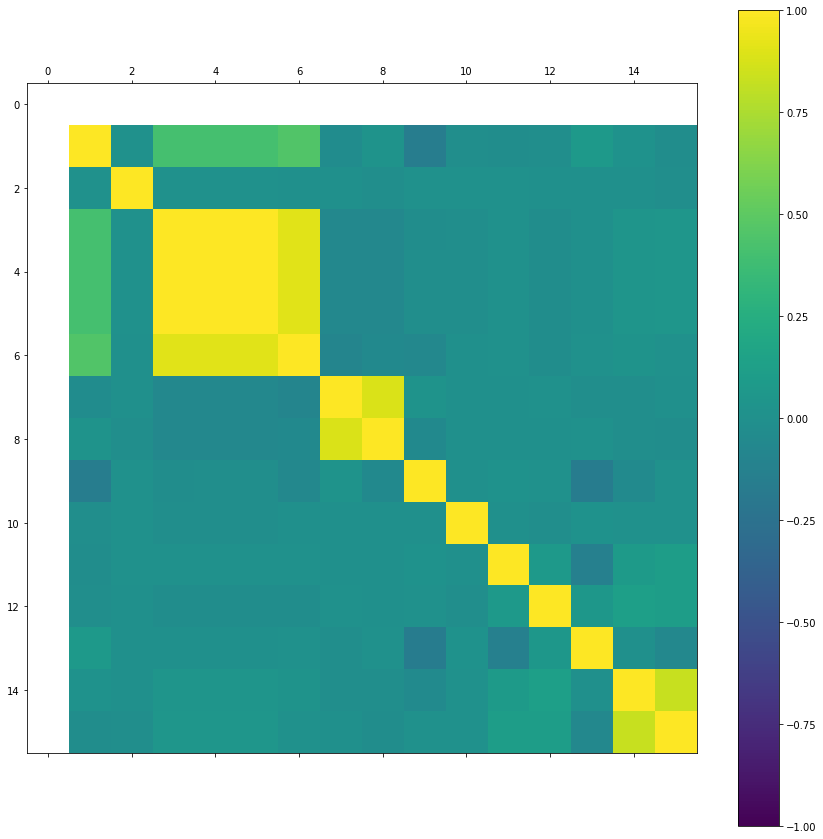

In [54]:
#PASO 6.2: Análisis gráfico de Corerlación entre Variables

#Se observa la misma conclusión obtenida en el análisis anterior
#La variable con mayor correlación con INSTR_PJE es PF_PJE

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacion, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()



/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2019.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


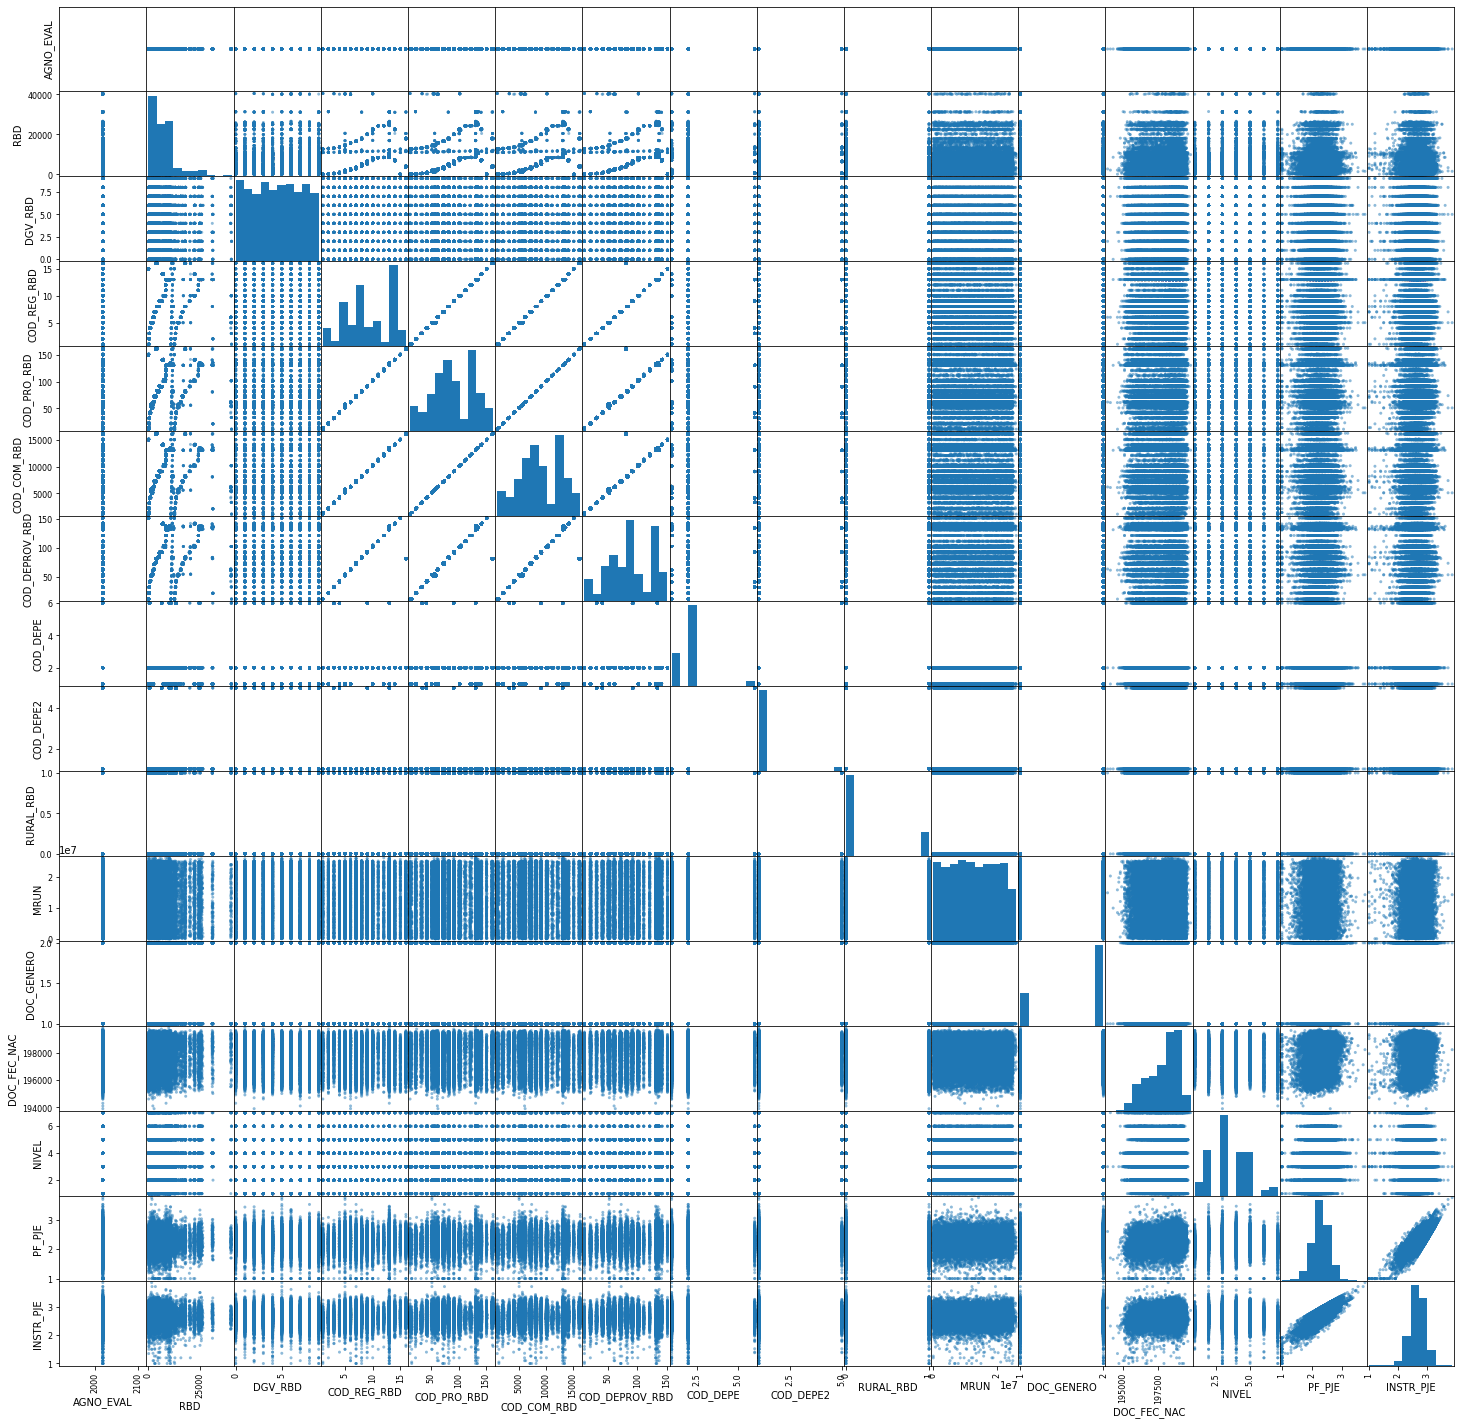

In [52]:
#PASO 6.3: Análisis gráfico de Corerlación entre Variables v2

scatter_matrix(datos, figsize=(25,25))
plt.show()

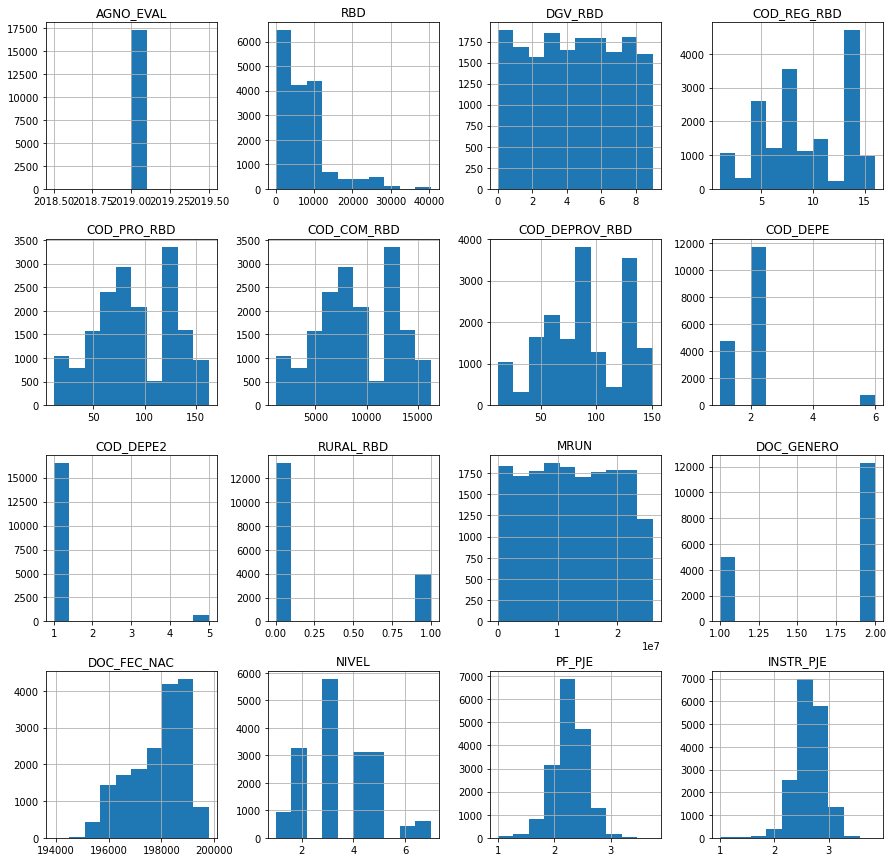

In [64]:
#Gráficos de distribución de todas las variables

datos.hist(figsize=(15,15))
plt.show()

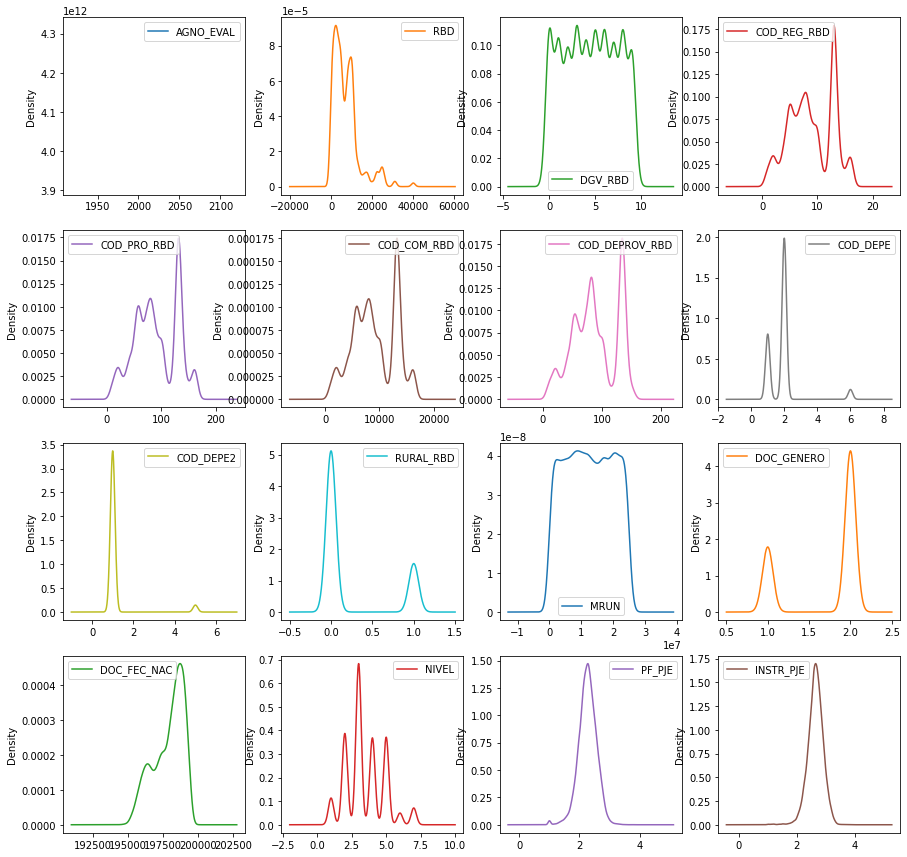

In [157]:
#Gráficos de densidad

#datos.loc[:,'PF_PJE':'INSTR_PJE'].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,15))
datos.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,15))
plt.show()

In [61]:
#SESGO (SKEW)

skew = datos.skew().round(decimals=2)
skew.head(20)

#valores positivos (sesgo a la derecha), valores negativos (sesgo a la izquierda), valores cercanos a 0 muestran menos sesgo

AGNO_EVAL         0.00
RBD               1.81
DGV_RBD          -0.00
COD_REG_RBD      -0.04
COD_PRO_RBD      -0.05
COD_COM_RBD      -0.05
COD_DEPROV_RBD   -0.08
COD_DEPE          3.01
COD_DEPE2         4.59
RURAL_RBD         1.28
MRUN              0.00
DOC_GENERO       -0.94
DOC_FEC_NAC      -0.64
NIVEL             0.47
PF_PJE           -0.35
INSTR_PJE        -0.60
dtype: float64

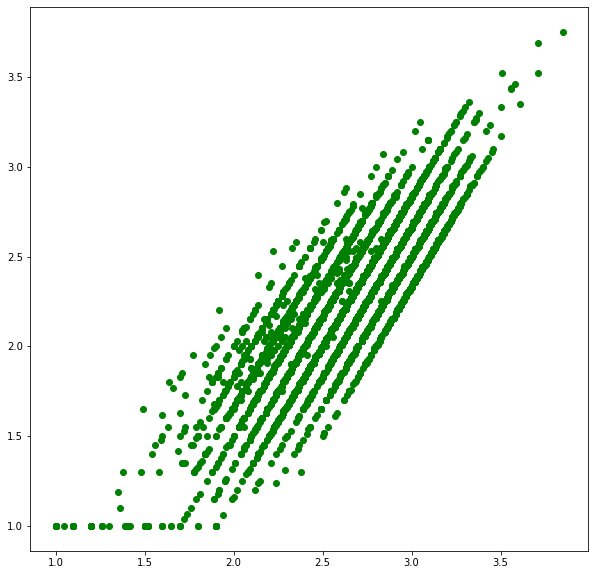

In [120]:
#PASO 7: Separación previa de las variables

X = datos.loc[:,'INSTR_PJE']
y = datos.loc[:,'PF_PJE']

#Gráfico de distribución de las dos variables elegidas
fig = plt.figure(figsize=(10,10))
plt.scatter(X, y, color="green")



In [122]:
#PASO 8: Separar datos en entrenamiento y Validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [123]:
print("X: ", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape, "y:", y.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

X:  (17244,) X_train: (12070,) X_test: (5174,) y: (17244,) y_train: (12070,) y_test: (5174,)


In [124]:
#PASO 6.1 --> Definición del tipo de modelo que usaremos

modelo = LinearRegression()
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
#PASO 6.2 --> Entrenar modelo
#X_train
#X_train.values.reshape(-1,1)
modelo.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
#PASO 6.3 --> Predecir
modelo.predict(X_train.values.reshape(-1,1)).round(decimals=3)

array([[2.594],
       [2.358],
       [2.368],
       ...,
       [2.114],
       [2.368],
       [1.906]])

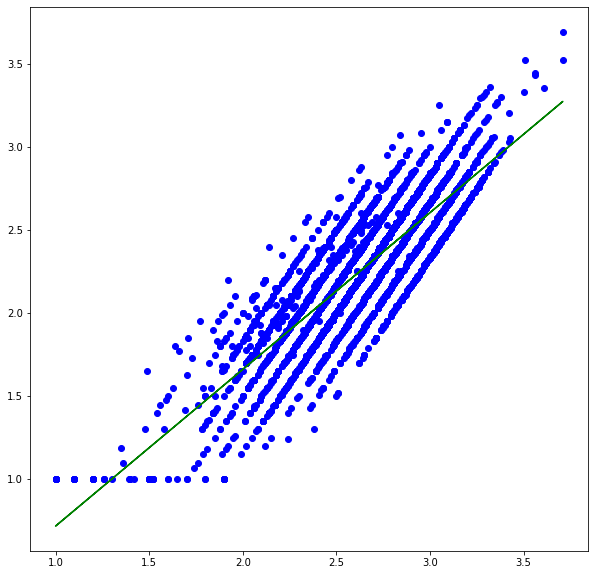

In [136]:
#PASO 7.1: Graficar los datos de Entrenamiento

fig = plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, modelo.predict(X_train.values.reshape(-1,1)), color="green")
plt.show()

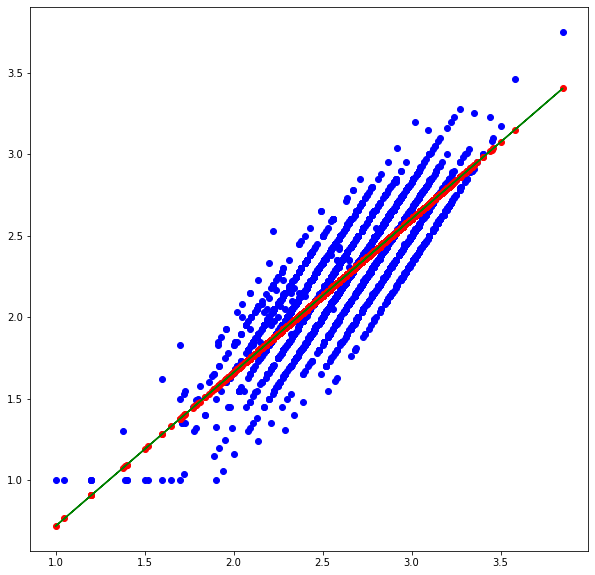

In [141]:
#PASO 7.2: Graficar los datos de Test

fig = plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test, color="blue")
plt.scatter(X_test, modelo.predict(X_test.values.reshape(-1,1)), color="red")
plt.plot(X_test, modelo.predict(X_test.values.reshape(-1,1)), color="green")
plt.show()

Conclusión
==========

Se puede concluir que el modelo de Regresión Lineal utilizado serviría para para predecir el resultado de **INSTR_PJE** a partir de la variable **PF_PJE**, con una alta efectividad (mayor al 80%). 
Esto quiere decir, que el puntaje obtenido por los docentes en el Portafolio, es un buen predictor de su desempeño en la Evaluación Docente.